<a href="https://colab.research.google.com/github/cgustin99/Data-Science/blob/main/StocksScraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We make a bot to scrape stock data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
from pytz import timezone
from matplotlib.animation import FuncAnimation

%matplotlib inline
plt.rcParams["figure.figsize"] = (17,10)

In [78]:
!apt update
!apt install chromium-chromedriver
!pip install selenium

from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',options=options)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [79]:
df = pd.DataFrame(columns = ['Company', 'Price', 'Change', '%Change'])
df

,Company,Price,Change,%Change


In [86]:
def get_stock_table():
  url = 'https://money.cnn.com/data/hotstocks/index.html' 
  driver.get(url)

  elements = driver.find_elements_by_xpath('//td')

  current_data_row = []
  num_rows = 0
  for e in elements:
    current_data_row.append(e.text)
    if len(current_data_row) == 4:
      df.loc[num_rows] = current_data_row
      current_data_row = []
      num_rows += 1

  display(df)

In [89]:
get_stock_table()

,Company,Price,Change,%Change
0,NI NiSource Inc,25.47,0.00,0.00%
1,INFO IHS Markit Ltd,115.57,0.00,0.00%
2,CMS CMS Energy Corp,63.82,0.00,0.00%
3,FTV Fortive Corp,73.92,0.00,0.00%
4,ETR Entergy Corp,110.14,0.00,0.00%
5,F Ford Motor Co,12.84,-0.16,-1.23%
6,PFE Pfizer Inc,48.71,-0.61,-1.24%
7,STE Steris plc,216.28,0.00,0.00%
8,CCL Carnival Corp,22.48,0.00,0.00%
9,PKG Packaging Corp of America,145.05,0.00,0.00%


Now, we will track and graph the stock prices of one stock for 5 minutes and see how they fluctuate. Let's use Pfizer's stock price.

In [90]:
#get_index(company) returns the index of the stock price from our td element
def get_index(company):
  for i, data in enumerate(driver.find_elements_by_xpath('//td')):
    if data.text == company:
        break
  return i + 1 #Return i + 1 because i + 1 gives current stock price data while i gives the name of the company

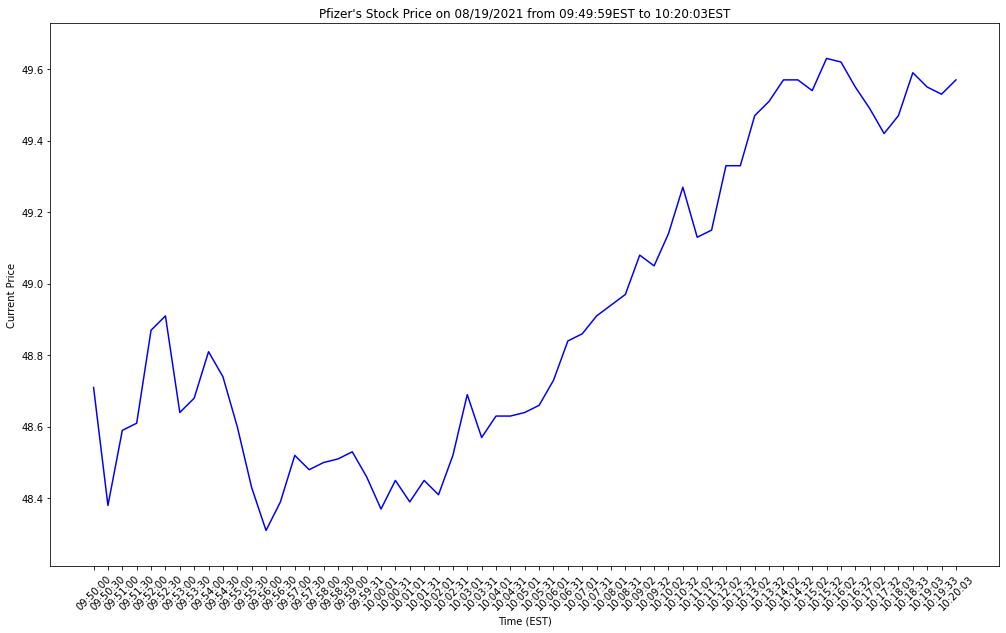

In [91]:
#Plot stock prices over a period of time
num_minutes = 30
num_seconds = 60 * num_minutes
sample_frequency = 30 #Seconds between each sample

ny = timezone('America/New_York')

time_array = []
data_array = []
start_time = time.time()
start_time_dt = datetime.datetime.now(ny).time()

index = get_index('PFE Pfizer Inc')

while True:
  current_time = time.time()
  elapsed = current_time - start_time

  time_array.append(str(datetime.datetime.now(ny).time())[:8]) #[:8] so that we only take hr:min:sec from string
  data_of_interest = [data.text for i, data in enumerate(driver.find_elements_by_xpath('//td')) if i == index]
  data_array.append(float(data_of_interest[0]))

  if elapsed > num_seconds:
    break
  
  time.sleep(sample_frequency)

plt.plot(time_array, data_array, 'b-' )
plt.xticks(rotation = 45)
plt.ylim(min(data_array) - 0.1, max(data_array) + 0.1)

plt.ylabel("Current Price")
plt.xlabel("Time (EST)")
plt.title("Pfizer's Stock Price on " + str(datetime.date.today().strftime("%m/%d/%Y")) + " from " + str(start_time_dt)[:8] + "EST to " + str(datetime.datetime.now(ny).time())[:8] + "EST")
plt.show()